# Benchmark Campaign of a Graphene with k-points
This benchmark takes the input positions of a Graphene system
and creates two sets of run with and without (OpenCL) GPU acceleration.

In [1]:
from sys import path
path.insert(0,'../')
import benchmark

In [2]:
from BigDFT.Logfiles import Logfile as L
inp, posinp=benchmark.run_spec_from_log(L('log.yaml'))

We have used the input positions of a previously existing run

In [4]:
from BigDFT.Systems import system_from_dict_positions
system_from_dict_positions(**posinp).display()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
mpiomp=[1,2,4,9]
maxcores = 36
def run_spec_product(name, mpiomp, maxcores, **kwargs):
    from itertools import product
    return {name: [dict(mpi=mpi, omp=omp, 
                   name='-'.join([name, str(mpi), str(omp)]),
                   **kwargs)
                   for mpi,omp in product(mpiomp,mpiomp)
                   if mpi*omp <= maxcores]}

In [6]:
campaign_cpu = benchmark.campaign(input=inp,run_spec=run_spec_product('gr', mpiomp, maxcores, posinp=posinp))

In [7]:
from copy import deepcopy
inp_ocl=deepcopy(inp)
inp_ocl.use_gpu_acceleration(flavour='OCL')
inp_ocl['perf'].pop('ocl_platform')
inp_ocl['perf'].pop('ocl_devices')

In [8]:
campaign_gpu = benchmark.campaign(input=inp_ocl,run_spec=run_spec_product('gr-ocl', mpiomp, maxcores, posinp=posinp))

In [11]:
from BigDFT.Interop import RemoteManagerInterop as RM
from remotemanager import Computer, Dataset
platforms, applications = RM.get_host_specs('wisteria',uri='../computers')
aquarius = Computer(**platforms['gpu'])

In [12]:
platforms.keys()

dict_keys(['cpu', 'gpu', 'front'])

In [13]:
applications.keys()

dict_keys(['odyssey_gnu_nompi', 'odyssey', 'aquarius'])

In [14]:
remote_basedir="/data/scratch/jh210022a/q25020/benchmarks"
key='graphene-cs'
ds=Dataset(benchmark.run_bigdft,url=aquarius,**benchmark.dataset_args(key, remote_basedir),**applications['aquarius'])
ds.wipe_runs()

In [9]:
for run in campaign_cpu:
    ds.append_run(**run, nodes=1)

appended run gr-1-1
appended run gr-1-2
appended run gr-1-4
appended run gr-1-9
appended run gr-2-1
appended run gr-2-2
appended run gr-2-4
appended run gr-2-9
appended run gr-4-1
appended run gr-4-2
appended run gr-4-4
appended run gr-4-9
appended run gr-9-1
appended run gr-9-2
appended run gr-9-4


In [10]:
ds.run(time=7200)

Running Dataset
assessing run for runner graphene-cs-3b802731-gr-1-1... running
assessing run for runner graphene-cs-3b802731-gr-1-2... running
assessing run for runner graphene-cs-3b802731-gr-1-4... running
assessing run for runner graphene-cs-3b802731-gr-1-9... running
assessing run for runner graphene-cs-3b802731-gr-2-1... running
assessing run for runner graphene-cs-3b802731-gr-2-2... running
assessing run for runner graphene-cs-3b802731-gr-2-4... running
assessing run for runner graphene-cs-3b802731-gr-2-9... running
assessing run for runner graphene-cs-3b802731-gr-4-1... running
assessing run for runner graphene-cs-3b802731-gr-4-2... running
assessing run for runner graphene-cs-3b802731-gr-4-4... running
assessing run for runner graphene-cs-3b802731-gr-4-9... running
assessing run for runner graphene-cs-3b802731-gr-9-1... running
assessing run for runner graphene-cs-3b802731-gr-9-2... running
assessing run for runner graphene-cs-3b802731-gr-9-4... running
Donesferring 33 Files...

In [11]:
for run, status in zip(ds.runners,ds.is_finished):
    print(run.name,status)

gr-1-1 False
gr-1-2 False
gr-1-4 False
gr-1-9 False
gr-2-1 False
gr-2-2 False
gr-2-4 False
gr-2-9 False
gr-4-1 False
gr-4-2 False
gr-4-4 True
gr-4-9 True
gr-9-1 True
gr-9-2 True
gr-9-4 True


In [20]:
for run in campaign_gpu:
    ds.append_run(**run, nodes=1)

appended run gr-ocl-1-1
appended run gr-ocl-1-2
appended run gr-ocl-1-4
appended run gr-ocl-1-9
appended run gr-ocl-2-1
appended run gr-ocl-2-2
appended run gr-ocl-2-4
appended run gr-ocl-2-9
appended run gr-ocl-4-1
appended run gr-ocl-4-2
appended run gr-ocl-4-4
appended run gr-ocl-4-9
appended run gr-ocl-9-1
appended run gr-ocl-9-2
appended run gr-ocl-9-4


In [21]:
ds.run(time=7200)

Running Dataset
assessing run for runner graphene-cs-3b802731-gr-ocl-1-1... running
assessing run for runner graphene-cs-3b802731-gr-ocl-1-2... running
assessing run for runner graphene-cs-3b802731-gr-ocl-1-4... running
assessing run for runner graphene-cs-3b802731-gr-ocl-1-9... running
assessing run for runner graphene-cs-3b802731-gr-ocl-2-1... running
assessing run for runner graphene-cs-3b802731-gr-ocl-2-2... running
assessing run for runner graphene-cs-3b802731-gr-ocl-2-4... running
assessing run for runner graphene-cs-3b802731-gr-ocl-2-9... running
assessing run for runner graphene-cs-3b802731-gr-ocl-4-1... running
assessing run for runner graphene-cs-3b802731-gr-ocl-4-2... running
assessing run for runner graphene-cs-3b802731-gr-ocl-4-4... running
assessing run for runner graphene-cs-3b802731-gr-ocl-4-9... running
assessing run for runner graphene-cs-3b802731-gr-ocl-9-1... running
assessing run for runner graphene-cs-3b802731-gr-ocl-9-2... running
assessing run for runner graphen

In [3]:
# from BigDFT.Interop import RemoteManagerInterop as RM
# cp=RM.code_compiler(builddir='/opt/bigdft')
# cp.append_run(action='buildone -f pybigdft')
# cp.run()
# cp.hard_reset()

Warning! The current url is not a subclass of Computer, the dataset may not function as expected.
appended run runner-0
Running Dataset
assessing run for runner compile-c48c306e-runner-0... running
Transferring 3 Files... Done


In [15]:
df=benchmark.dataframe(benchmark.extract_results(ds.local_dir))

Document 0 of stream NOT loaded, error: while parsing a flow node
did not find expected node content
  in "<unicode string>", line 7078, column 1
graphene-cs/log-gr-2-1.yaml No log information provided.
Document 0 of stream NOT loaded, error: while parsing a flow node
did not find expected node content
  in "<unicode string>", line 11052, column 1
graphene-cs/log-gr-4-1.yaml No log information provided.
Document 0 of stream NOT loaded, error: while parsing a flow node
did not find expected node content
  in "<unicode string>", line 18963, column 1
graphene-cs/log-gr-4-2.yaml No log information provided.


In [16]:
from pandas import concat
dft=df[['Walltime','timefile','name']].dropna().sort_values('Walltime',ascending=False)
dft=concat([dft[['ocl' not in idx for idx in dft.index]],benchmark.df_select(dft,{0:'ocl'})])

In [17]:
data=benchmark.timefile_data(dft.timefile,only_last=True)

Text(0.5, 1.0, 'Run comparison with speedup')

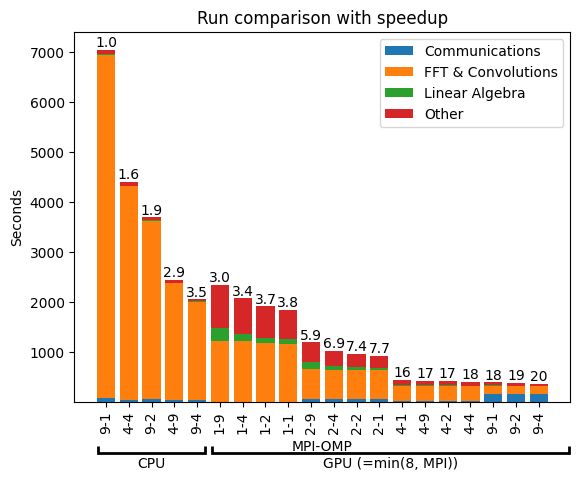

In [18]:
aggregate=[('Communications',['Communications']),
           ('FFT & Convolutions',['Convolutions','PS Computation','Potential']),
           ('Linear Algebra',['BLAS-LAPACK', 'Linear Algebra']),
           ('Other',['Flib LowLevel','Unknown', 'Other'])]
scfs = data[1]
annotations = [round(scfs[0]/d) if d*10 < scfs[0] else round(scfs[0]/d,1) for d in scfs]
ax=benchmark.draw_barplot([l[-3:] for l in dft.name],data,aggregate=aggregate,annotations=annotations)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('MPI-OMP')
ax.set_ylabel('Seconds')
ax.legend(loc='best')
spine_pos=-0.14
tip_pos=-0.12
extra_off = 0.35
for start,end,label in [(0,4,'CPU'),
                        (5,len(dft.index),'GPU (=min(8, MPI))')]:
    benchmark.add_label_band(ax, 'x', start-extra_off, end+extra_off, label,
                   spine_pos=spine_pos,tip_pos=tip_pos)
ax.set_title('Run comparison with speedup')

In [19]:
benchmark.lfs_add_files(list(dft.index)+list(dft.timefile))

Tracking "graphene-cs/log-gr-9-1.yaml"
Tracking "graphene-cs/log-gr-4-4.yaml"
Tracking "graphene-cs/log-gr-9-2.yaml"
Tracking "graphene-cs/log-gr-4-9.yaml"
Tracking "graphene-cs/log-gr-9-4.yaml"
Tracking "graphene-cs/log-gr-ocl-1-9.yaml"
Tracking "graphene-cs/log-gr-ocl-1-4.yaml"
Tracking "graphene-cs/log-gr-ocl-1-2.yaml"
Tracking "graphene-cs/log-gr-ocl-1-1.yaml"
Tracking "graphene-cs/log-gr-ocl-2-9.yaml"
Tracking "graphene-cs/log-gr-ocl-2-4.yaml"
Tracking "graphene-cs/log-gr-ocl-2-2.yaml"
Tracking "graphene-cs/log-gr-ocl-2-1.yaml"
Tracking "graphene-cs/log-gr-ocl-4-1.yaml"
Tracking "graphene-cs/log-gr-ocl-4-9.yaml"
Tracking "graphene-cs/log-gr-ocl-4-2.yaml"
Tracking "graphene-cs/log-gr-ocl-4-4.yaml"
Tracking "graphene-cs/log-gr-ocl-9-1.yaml"
Tracking "graphene-cs/log-gr-ocl-9-2.yaml"
Tracking "graphene-cs/log-gr-ocl-9-4.yaml"
Tracking "graphene-cs/./time-gr-9-1.yaml"
Tracking "graphene-cs/./time-gr-4-4.yaml"
Tracking "graphene-cs/./time-gr-9-2.yaml"
Tracking "graphene-cs/./time-gr-4-

In [22]:
from os import remove, path
for f in benchmark.get_remotemanager_files(directory=ds.local_dir):
    if path.isfile(f):
        remove(f)